In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [5]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1036 - loss: 2.1152
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1093 - loss: 2.0940 - val_accuracy: 0.2301 - val_loss: 1.7065
Epoch 2/1000
16/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2431 - loss: 1.7396 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2571 - loss: 1.7172 - val_accuracy: 0.3333 - val_loss: 1.5541
Epoch 3/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3318 - loss: 1.5743
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3324 - loss: 1.5727 - val_accuracy: 0.3236 - val_loss: 1.4749
Epoch 4/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3518 - loss: 1.4979
Epoch 4: saving model to model/keypoint_classifier/keypoint_cl

25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6771 - loss: 0.8066
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6760 - loss: 0.8072 - val_accuracy: 0.8740 - val_loss: 0.5461
Epoch 25/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6637 - loss: 0.8287
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6656 - loss: 0.8266 - val_accuracy: 0.8675 - val_loss: 0.5230
Epoch 26/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6704 - loss: 0.8120
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6709 - loss: 0.8118 - val_accuracy: 0.8911 - val_loss: 0.5040
Epoch 27/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6864 - loss: 0.7694
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.

27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7408 - loss: 0.6544
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7413 - loss: 0.6542 - val_accuracy: 0.9268 - val_loss: 0.3287
Epoch 48/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7582 - loss: 0.6273
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7582 - loss: 0.6277 - val_accuracy: 0.9268 - val_loss: 0.3221
Epoch 49/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7546 - loss: 0.6225
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7548 - loss: 0.6225 - val_accuracy: 0.9276 - val_loss: 0.3195
Epoch 50/1000
16/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7522 - loss: 0.6482 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifi

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7805 - loss: 0.5798
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7803 - loss: 0.5800 - val_accuracy: 0.9374 - val_loss: 0.2770
Epoch 71/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7690 - loss: 0.6024
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7691 - loss: 0.6017 - val_accuracy: 0.9390 - val_loss: 0.2824
Epoch 72/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7798 - loss: 0.5686
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7793 - loss: 0.5708 - val_accuracy: 0.9358 - val_loss: 0.2759
Epoch 73/1000
16/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.5422 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier

26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8107 - loss: 0.5071
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8096 - loss: 0.5086 - val_accuracy: 0.9569 - val_loss: 0.2440
Epoch 94/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.5686
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7844 - loss: 0.5669 - val_accuracy: 0.9537 - val_loss: 0.2480
Epoch 95/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8033 - loss: 0.5245
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8029 - loss: 0.5250 - val_accuracy: 0.9496 - val_loss: 0.2456
Epoch 96/1000
15/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7788 - loss: 0.5929 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifi

25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8083 - loss: 0.5056
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8089 - loss: 0.5069 - val_accuracy: 0.9585 - val_loss: 0.2374
Epoch 117/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7867 - loss: 0.5442
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7870 - loss: 0.5438 - val_accuracy: 0.9585 - val_loss: 0.2334
Epoch 118/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8110 - loss: 0.5119
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8108 - loss: 0.5124 - val_accuracy: 0.9585 - val_loss: 0.2367
Epoch 119/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 0.5249
Epoch 119: saving model to model/keypoint_classifier/keypoint_cla

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.5076
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8085 - loss: 0.5079 - val_accuracy: 0.9577 - val_loss: 0.2242
Epoch 140/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8157 - loss: 0.4775
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8156 - loss: 0.4780 - val_accuracy: 0.9553 - val_loss: 0.2296
Epoch 141/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8115 - loss: 0.5177
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8115 - loss: 0.5173 - val_accuracy: 0.9569 - val_loss: 0.2281
Epoch 142/1000
15/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7933 - loss: 0.5463 
Epoch 142: saving model to model/keypoint_classifier/keypoint_cla

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.2211 


In [6]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[1.4290090e-02 3.7273910e-02 9.4810915e-01 1.4246457e-05 1.6445414e-07
 3.1251559e-04]
2


# Confusion matrix

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


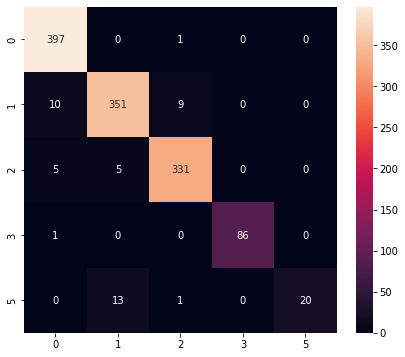

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       398
           1       0.95      0.95      0.95       370
           2       0.97      0.97      0.97       341
           3       1.00      0.99      0.99        87
           5       1.00      0.59      0.74        34

    accuracy                           0.96      1230
   macro avg       0.98      0.90      0.93      1230
weighted avg       0.96      0.96      0.96      1230



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\91779\AppData\Local\Temp\tmpcaym2is4\assets


INFO:tensorflow:Assets written to: C:\Users\91779\AppData\Local\Temp\tmpcaym2is4\assets


# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))